In [178]:
import pandas as pd

df = pd.read_csv("data/world_bank_data.csv", sep =';', skiprows=1, 
                 names=["Country_Name",
                        "Country_Code",
                        "Continent_Name",
                        "Continent_Code",
                        "Population_1960",
                        "Population_2018",
                        "GDP_per_capita_1960",
                        "GDP_per_capita_2018",
                        "Life_expectancy_at_birth_1960",
                        "Life_expectancy_at_birth_2018"
])

gdp_cap = list(df["GDP_per_capita_2018"][(df["Population_2018"]>0) & (df["GDP_per_capita_2018"]>0) & (df["Life_expectancy_at_birth_2018"]>0)])
life_exp = list(df["Life_expectancy_at_birth_2018"][(df["Population_2018"]>0) & (df["GDP_per_capita_2018"]>0) & (df["Life_expectancy_at_birth_2018"]>0)])
life_exp_1960 = list(df["Life_expectancy_at_birth_1960"][(df["Life_expectancy_at_birth_1960"]>0) & (df["Life_expectancy_at_birth_2018"]>0)])
pop = list(df["Population_2018"][(df["Population_2018"]>0) & (df["GDP_per_capita_2018"]>0) & (df["Life_expectancy_at_birth_2018"]>0)]/1000000)
continent = list(df["Continent_Name"][(df["Population_2018"]>0) & (df["GDP_per_capita_2018"]>0) & (df["Life_expectancy_at_birth_2018"]>0)])

asian_m=df[["Life_expectancy_at_birth_2018","GDP_per_capita_2018","Country_Name"]][df.Country_Name.isin(['China','India'])]
asian_m=asian_m.values.tolist()

## Labels

Es hora de personalizar tu propia trama. Esta es la parte divertida, ¡verás tu trama cobrar vida!

Trabajará en el diagrama de dispersión con datos de desarrollo mundial: PIB per cápita en el eje x (escala logarítmica), esperanza de vida en el eje y. El código para esta trama está disponible en el script.

Como primer paso, agreguemos etiquetas de eje y un título a la gráfica. Usted puede hacer esto con las funciones **xlabel(), ylabel() y title()**, disponibles en *matplotlib.pyplot*. Este subpaquete ya está importado como *plt*.

**Actividad**

* Las cuerdas *xlaby* *ylab* ya están configuradas para ti. Use estas variables para establecer la etiqueta de los ejes x e y.
* El string *title* también está codificada para ti. Úselo para agregar un título a la trama.
* Después de estas personalizaciones, finalice el script con **plt.show()** para mostrar realmente la trama.


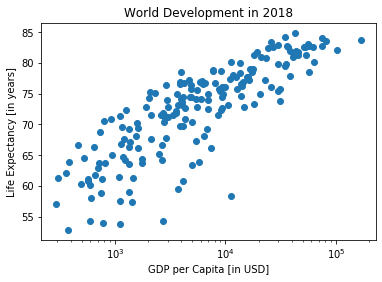

In [179]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Basic scatter plot, log scale
plt.scatter(gdp_cap, life_exp)
plt.xscale('log') 

# Strings
xlab = 'GDP per Capita [in USD]'
ylab = 'Life Expectancy [in years]'
title = 'World Development in 2018'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)


# Add title
plt.title(title)

# After customizing, display the plot
plt.show()

## Ticks

Las personalizaciones que ha codificado hasta ahora están disponibles en el script, en una forma más concisa.

En el video, Hugo demostró cómo puedes controlar los t-y al especificar dos argumentos:

**plt.yticks([0,1,2], ["one","two","three"])**

En este ejemplo, los ticks correspondientes a los números 0, 1 y 2 serán reemplazados por uno , dos y tres , respectivamente.

Hagamos algo similar para el eje x de su gráfico de desarrollo mundial, con la función **xticks()**. Los valores de tick *1000, 10000 y 100000* deben ser reemplazados por *1k, 10ky 100k*. Con este fin, ya se han creado dos listas para usted: *tick_val y tick_lab*.

**Actividad**

* Use *tick_val* y *tick_lab* como entradas para la función **xticks()** para hacer que la trama sea más legible.
* Como de costumbre, muestre el diagrama **plt.show()** después de haber agregado las personalizaciones.


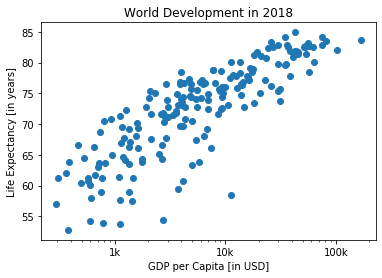

In [180]:
# Scatter plot
plt.scatter(gdp_cap, life_exp)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2018')

# Definition of tick_val and tick_lab
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']

# Adapt the ticks on the x-axis
plt.xticks(tick_val,tick_lab)

# After customizing, display the plot
plt.show()

## Sizes

En este momento, el diagrama de dispersión es solo una nube de puntos azules, indistinguibles entre sí. Cambiemos esto. ¿No sería bueno si el tamaño de los puntos corresponde a la población?

Para lograr esto, hay una lista *pop* cargada en su espacio de trabajo. Contiene números de población para cada país expresados en millones. Puede ver que esta lista se agrega al método de dispersión, como argumento *s*, para el tamaño.

**Actividad**
* Ejecute el script para ver cómo cambia la trama.
* Se ve bien, pero aumentar el tamaño de las burbujas hará que las cosas se destaquen más.
    * Importe el paquete *numpy* como *np*.
    * Úselo **np.array()** para crear una matriz numpy de la lista *pop*. Llame a este conjunto de Numpy *np_pop*.
    * Duplique los valores de *np_pop* al establecer el valor de *np_pop* igual a *np_pop * 2*. Debido a que *np_pop* es una matriz Numpy, cada elemento de la matriz se duplicará.
    * Cambie el *s* argumento dentro **plt.scatter()** para ser *np_pop* en lugar de *pop*.

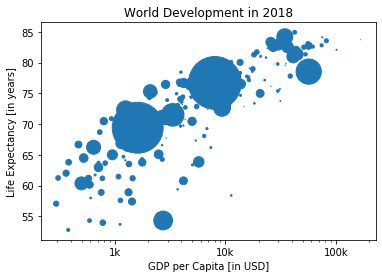

In [181]:
# Import numpy as np
import numpy as np

# Store pop as a numpy array: np_pop
np_pop = np.array(pop)

# Double np_pop
np_pop = np_pop * 2

# Update: set s argument to np_pop
plt.scatter(gdp_cap, life_exp, s = np_pop)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2018')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])

# Display the plot
plt.show()

## Colors

El código que ha escrito hasta ahora está disponible en el script.

¡El siguiente paso es hacer que la trama sea más colorida! Para hacer esto, colse ha creado una lista para usted. Es una lista con un color para cada país correspondiente, dependiendo del continente del que forma parte el país.

¿Cómo hicimos la lista *col* que preguntas? Los datos del banco mundial contienen una lista *continent* con el continente al que pertenece cada país. Se construye un diccionario que mapea continentes en colores:

**dict = {
            'Asia':'red',  
            'Europe':'green',  
            'Africa':'blue',  
            'Americas':'yellow',  
            'Oceania':'black'  
}**

**Actividad**

* Añadir *c = col* a los argumentos de la función **plt.scatter()**.
* Cambia la opacidad de las burbujas configurando el argumento *alpha* en el *0.8* interior **plt.scatter()**. Alpha se puede establecer de cero a uno, donde cero es totalmente transparente y uno no es nada transparente.

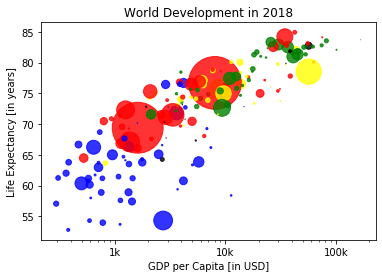

In [182]:
convencion = {
            'Asia':'red',  
            'Europe':'green',  
            'Africa':'blue',  
            'Americas':'yellow',  
            'Oceania':'black'  
}

col = []
for x in continent:
    col.append(convencion.get(x))
# Specify c and alpha inside plt.scatter()
plt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) * 2, c = col, alpha = 0.8)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2018')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Show the plot
plt.show()

## Additional Customizations

Si tiene otra mirada al script, debajo **# Additional Customizations**, verá que ahora hay dos funciones **plt.text()**. Añaden las palabras "India" y "China"en la trama.

**Actividad**
* Agregue **plt.grid(True)** después de las funciones **plt.text()** para que las líneas de cuadrícula se dibujen en el diagrama.

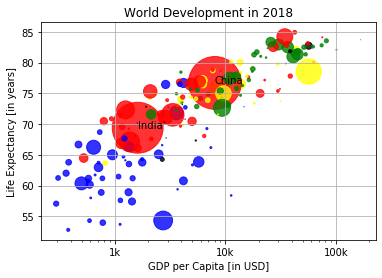

In [183]:
# Scatter plot
plt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) * 2, c = col, alpha = 0.8)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2018')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Additional customizations
plt.text(asian_m[0][1], asian_m[0][0], asian_m[0][2])
plt.text(asian_m[1][1], asian_m[1][0], asian_m[1][2])

# Add grid() call
plt.grid(True)

# Show the plot
plt.show()

## Interpretación

Si observa su colorida parcela, está claro que las personas viven más en países con un PIB per cápita más alto. Ningún país de altos ingresos tiene una esperanza de vida realmente corta, y ningún país de bajos ingresos tiene una esperanza de vida muy larga. Aún así, hay una gran diferencia en la esperanza de vida entre países con el mismo nivel de ingresos. La mayoría de las personas vive en países de ingresos medios donde la diferencia en la esperanza de vida es enorme entre países; dependiendo de cómo se distribuye el ingreso y cómo se usa.

¿Qué puedes decir sobre la trama?

Respuestas posibles
* Los países en azul, correspondientes a África, tienen una baja esperanza de vida y un bajo PIB per cápita.
* Existe una correlación negativa entre el PIB per cápita y la esperanza de vida.
* China tiene un menor PIB per cápita y una menor esperanza de vida en comparación con India.